<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Data-Description:" data-toc-modified-id="Data-Description:-0.1">Data Description:</a></span></li><li><span><a href="#Class-Count:" data-toc-modified-id="Class-Count:-0.2">Class Count:</a></span></li><li><span><a href="#Train-and-Validation-Split:-" data-toc-modified-id="Train-and-Validation-Split:--0.3">Train and Validation Split: </a></span></li><li><span><a href="#Prebuilt-Model:-FaceNet--(Online-Resources)" data-toc-modified-id="Prebuilt-Model:-FaceNet--(Online-Resources)-0.4">Prebuilt Model: FaceNet  (Online Resources)</a></span></li></ul></li><li><span><a href="#The-FaceNet-Architecture:" data-toc-modified-id="The-FaceNet-Architecture:-1"><a href="https://arxiv.org/abs/1503.03832" target="_blank">The FaceNet Architecture:</a></a></span><ul class="toc-item"><li><span><a href="#FaceNet-Architecture-Flow:" data-toc-modified-id="FaceNet-Architecture-Flow:-1.1">FaceNet Architecture Flow:</a></span></li><li><span><a href="#FaceNet-Architecture-summary" data-toc-modified-id="FaceNet-Architecture-summary-1.2">FaceNet Architecture summary</a></span></li><li><span><a href="#Training-the-complete-'FaceNet-Model'-on-the-Data:" data-toc-modified-id="Training-the-complete-'FaceNet-Model'-on-the-Data:-1.3">Training the complete 'FaceNet Model' on the Data:</a></span></li><li><span><a href="#Time-of-Execution-for-Training:" data-toc-modified-id="Time-of-Execution-for-Training:-1.4">Time of Execution for Training:</a></span></li><li><span><a href="#Learning-Losses-and-Accuracies:" data-toc-modified-id="Learning-Losses-and-Accuracies:-1.5">Learning Losses and Accuracies:</a></span></li></ul></li></ul></div>

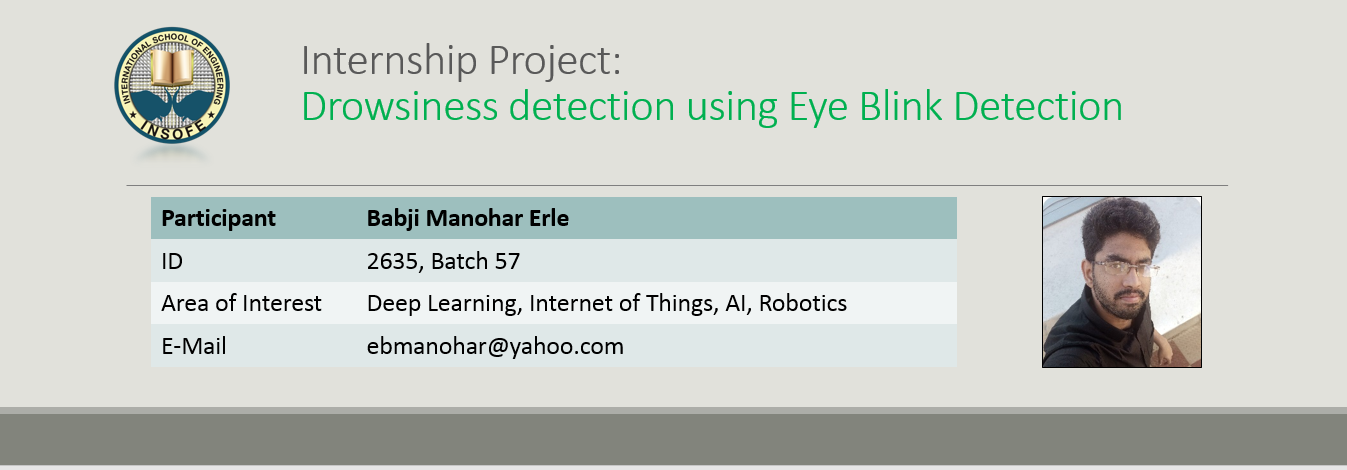

Data Description:
---
```
Image Classification:
--------------------
7552 Images are classified into 10 classes, each class has set of images in a separate folder.

The Image data description: Data has been augumented for generalization.
---------------------------
	Airplanes         - 828 RGB images with resolution of 400x160 approx.
	Background_Google - 759 RGB images with resolution of 500x300 approx.
	Bonsai            - 708 RGB images with resolution of 300x280 approx.
	Car_side          - 712 RGB images with resolution of 300x197 approx.
	Faces             - 730 RGB images with resolution of 500x340 approx.
	Faces_easy        - 731 RGB images with resolution of 280x320 approx.
	Grand_Piano       - 689 RGB images with resolution of 300x280 approx.
	Leopards          - 775 RGB images with resolution of 192x128 approx.
	Motorbikes        - 798 RGB images with resolution of 260x140 approx.
	Watch             - 823 RGB images with resolution of 300x220 approx.
```

Class Count:
---
```
|   Classes           : Count of Data |
|-------------------------------------|
|   car_side          :      712      |
|   watch             :      823      |
|   Faces_easy        :      731      |
|   airplanes         :      828      |
|   Leopards          :      775      |
|   Motorbikes        :      798      |
|   BACKGROUND_Google :      759      |
|   Faces             :      730      |
|   bonsai            :      708      |
|   grand_piano       :      689      |

```

Train and Validation Split: 
----
```
Preprocesed the INPUT SHAPE = (224, 224, 3)
80% Training Data
20% Validation Data
---------------------------
Found 6046 images belonging to 10 classes.   < Train Data >
Found 1506 images belonging to 10 classes. < Validation Data >
```

Prebuilt Model: FaceNet  (Online Resources)
----
```
load_model('<MODEL_PATH>/facenet_keras.h5')
-----------
MODEL INPUT:  [<tf.Tensor 'input_1:0' shape=(?, 160, 160, 3) dtype=float32>]
MODEL OUTPUT: [<tf.Tensor 'Bottleneck_BatchNorm/cond/Merge:0' shape=(?, 128) dtype=float32>]
-----------
model.load_weights("<WEIGHTS_PATH>/facenet_keras_weights.h5")
-----------

nb_classes=10, layer.trainable = True

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adadelta')
```

# [The FaceNet Architecture:](https://arxiv.org/abs/1503.03832)
<br>

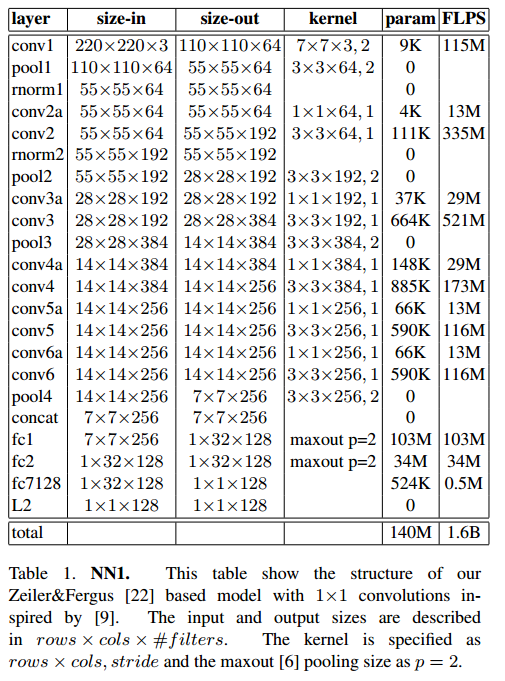

FaceNet Architecture Flow:
---
<br>



FaceNet Architecture summary
---

```
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
__________________________________________________________________________________________________
Conv2d_2a_3x3 (Conv2D)          (None, 77, 77, 32)   9216        Conv2d_1a_3x3_Activation[0][0]   
__________________________________________________________________________________________________
Conv2d_2a_3x3_BatchNorm (BatchN (None, 77, 77, 32)   96          Conv2d_2a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_2a_3x3_Activation (Activ (None, 77, 77, 32)   0           Conv2d_2a_3x3_BatchNorm[0][0]    
__________________________________________________________________________________________________
Conv2d_2b_3x3 (Conv2D)          (None, 77, 77, 64)   18432       Conv2d_2a_3x3_Activation[0][0]   
__________________________________________________________________________________________________
Conv2d_2b_3x3_BatchNorm (BatchN (None, 77, 77, 64)   192         Conv2d_2b_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_2b_3x3_Activation (Activ (None, 77, 77, 64)   0           Conv2d_2b_3x3_BatchNorm[0][0]    
__________________________________________________________________________________________________
MaxPool_3a_3x3 (MaxPooling2D)   (None, 38, 38, 64)   0           Conv2d_2b_3x3_Activation[0][0]   
__________________________________________________________________________________________________
Conv2d_3b_1x1 (Conv2D)          (None, 38, 38, 80)   5120        MaxPool_3a_3x3[0][0]             
__________________________________________________________________________________________________
Conv2d_3b_1x1_BatchNorm (BatchN (None, 38, 38, 80)   240         Conv2d_3b_1x1[0][0]              
__________________________________________________________________________________________________
Conv2d_3b_1x1_Activation (Activ (None, 38, 38, 80)   0           Conv2d_3b_1x1_BatchNorm[0][0]    
__________________________________________________________________________________________________
Conv2d_4a_3x3 (Conv2D)          (None, 36, 36, 192)  138240      Conv2d_3b_1x1_Activation[0][0]   
__________________________________________________________________________________________________
Conv2d_4a_3x3_BatchNorm (BatchN (None, 36, 36, 192)  576         Conv2d_4a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_4a_3x3_Activation (Activ (None, 36, 36, 192)  0           Conv2d_4a_3x3_BatchNorm[0][0]    
__________________________________________________________________________________________________
Conv2d_4b_3x3 (Conv2D)          (None, 17, 17, 256)  442368      Conv2d_4a_3x3_Activation[0][0]   
__________________________________________________________________________________________________
Conv2d_4b_3x3_BatchNorm (BatchN (None, 17, 17, 256)  768         Conv2d_4b_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_4b_3x3_Activation (Activ (None, 17, 17, 256)  0           Conv2d_4b_3x3_BatchNorm[0][0]    
__________________________________________________________________________________________________
Block35_1_Branch_2_Conv2d_0a_1x (None, 17, 17, 32)   8192        Conv2d_4b_3x3_Activation[0][0]   
__________________________________________________________________________________________________
Block35_1_Branch_2_Conv2d_0a_1x (None, 17, 17, 32)   96          Block35_1_Branch_2_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block35_1_Branch_2_Conv2d_0a_1x (None, 17, 17, 32)   0           Block35_1_Branch_2_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_1_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   8192        Conv2d_4b_3x3_Activation[0][0]   
__________________________________________________________________________________________________
Block35_1_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   9216        Block35_1_Branch_2_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_1_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   96          Block35_1_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block35_1_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   96          Block35_1_Branch_2_Conv2d_0b_3x3[
__________________________________________________________________________________________________
Block35_1_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   0           Block35_1_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_1_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   0           Block35_1_Branch_2_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_1_Branch_0_Conv2d_1x1 ( (None, 17, 17, 32)   8192        Conv2d_4b_3x3_Activation[0][0]   
__________________________________________________________________________________________________
Block35_1_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   9216        Block35_1_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_1_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   9216        Block35_1_Branch_2_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_1_Branch_0_Conv2d_1x1_B (None, 17, 17, 32)   96          Block35_1_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block35_1_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   96          Block35_1_Branch_1_Conv2d_0b_3x3[
__________________________________________________________________________________________________
Block35_1_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   96          Block35_1_Branch_2_Conv2d_0c_3x3[
__________________________________________________________________________________________________
Block35_1_Branch_0_Conv2d_1x1_A (None, 17, 17, 32)   0           Block35_1_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block35_1_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   0           Block35_1_Branch_1_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_1_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   0           Block35_1_Branch_2_Conv2d_0c_3x3_
__________________________________________________________________________________________________
Block35_1_Concatenate (Concaten (None, 17, 17, 96)   0           Block35_1_Branch_0_Conv2d_1x1_Act
                                                                 Block35_1_Branch_1_Conv2d_0b_3x3_
                                                                 Block35_1_Branch_2_Conv2d_0c_3x3_
__________________________________________________________________________________________________
Block35_1_Conv2d_1x1 (Conv2D)   (None, 17, 17, 256)  24832       Block35_1_Concatenate[0][0]      
__________________________________________________________________________________________________
Block35_1_ScaleSum (Lambda)     (None, 17, 17, 256)  0           Conv2d_4b_3x3_Activation[0][0]   
                                                                 Block35_1_Conv2d_1x1[0][0]       
__________________________________________________________________________________________________
Block35_1_Activation (Activatio (None, 17, 17, 256)  0           Block35_1_ScaleSum[0][0]         
__________________________________________________________________________________________________
Block35_2_Branch_2_Conv2d_0a_1x (None, 17, 17, 32)   8192        Block35_1_Activation[0][0]       
__________________________________________________________________________________________________
Block35_2_Branch_2_Conv2d_0a_1x (None, 17, 17, 32)   96          Block35_2_Branch_2_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block35_2_Branch_2_Conv2d_0a_1x (None, 17, 17, 32)   0           Block35_2_Branch_2_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_2_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   8192        Block35_1_Activation[0][0]       
__________________________________________________________________________________________________
Block35_2_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   9216        Block35_2_Branch_2_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_2_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   96          Block35_2_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block35_2_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   96          Block35_2_Branch_2_Conv2d_0b_3x3[
__________________________________________________________________________________________________
Block35_2_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   0           Block35_2_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_2_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   0           Block35_2_Branch_2_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_2_Branch_0_Conv2d_1x1 ( (None, 17, 17, 32)   8192        Block35_1_Activation[0][0]       
__________________________________________________________________________________________________
Block35_2_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   9216        Block35_2_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_2_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   9216        Block35_2_Branch_2_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_2_Branch_0_Conv2d_1x1_B (None, 17, 17, 32)   96          Block35_2_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block35_2_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   96          Block35_2_Branch_1_Conv2d_0b_3x3[
__________________________________________________________________________________________________
Block35_2_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   96          Block35_2_Branch_2_Conv2d_0c_3x3[
__________________________________________________________________________________________________
Block35_2_Branch_0_Conv2d_1x1_A (None, 17, 17, 32)   0           Block35_2_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block35_2_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   0           Block35_2_Branch_1_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_2_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   0           Block35_2_Branch_2_Conv2d_0c_3x3_
__________________________________________________________________________________________________
Block35_2_Concatenate (Concaten (None, 17, 17, 96)   0           Block35_2_Branch_0_Conv2d_1x1_Act
                                                                 Block35_2_Branch_1_Conv2d_0b_3x3_
                                                                 Block35_2_Branch_2_Conv2d_0c_3x3_
__________________________________________________________________________________________________
Block35_2_Conv2d_1x1 (Conv2D)   (None, 17, 17, 256)  24832       Block35_2_Concatenate[0][0]      
__________________________________________________________________________________________________
Block35_2_ScaleSum (Lambda)     (None, 17, 17, 256)  0           Block35_1_Activation[0][0]       
                                                                 Block35_2_Conv2d_1x1[0][0]       
__________________________________________________________________________________________________
Block35_2_Activation (Activatio (None, 17, 17, 256)  0           Block35_2_ScaleSum[0][0]         
__________________________________________________________________________________________________
Block35_3_Branch_2_Conv2d_0a_1x (None, 17, 17, 32)   8192        Block35_2_Activation[0][0]       
__________________________________________________________________________________________________
Block35_3_Branch_2_Conv2d_0a_1x (None, 17, 17, 32)   96          Block35_3_Branch_2_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block35_3_Branch_2_Conv2d_0a_1x (None, 17, 17, 32)   0           Block35_3_Branch_2_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_3_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   8192        Block35_2_Activation[0][0]       
__________________________________________________________________________________________________
Block35_3_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   9216        Block35_3_Branch_2_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_3_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   96          Block35_3_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block35_3_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   96          Block35_3_Branch_2_Conv2d_0b_3x3[
__________________________________________________________________________________________________
Block35_3_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   0           Block35_3_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_3_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   0           Block35_3_Branch_2_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_3_Branch_0_Conv2d_1x1 ( (None, 17, 17, 32)   8192        Block35_2_Activation[0][0]       
__________________________________________________________________________________________________
Block35_3_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   9216        Block35_3_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_3_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   9216        Block35_3_Branch_2_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_3_Branch_0_Conv2d_1x1_B (None, 17, 17, 32)   96          Block35_3_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block35_3_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   96          Block35_3_Branch_1_Conv2d_0b_3x3[
__________________________________________________________________________________________________
Block35_3_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   96          Block35_3_Branch_2_Conv2d_0c_3x3[
__________________________________________________________________________________________________
Block35_3_Branch_0_Conv2d_1x1_A (None, 17, 17, 32)   0           Block35_3_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block35_3_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   0           Block35_3_Branch_1_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_3_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   0           Block35_3_Branch_2_Conv2d_0c_3x3_
__________________________________________________________________________________________________
Block35_3_Concatenate (Concaten (None, 17, 17, 96)   0           Block35_3_Branch_0_Conv2d_1x1_Act
                                                                 Block35_3_Branch_1_Conv2d_0b_3x3_
                                                                 Block35_3_Branch_2_Conv2d_0c_3x3_
__________________________________________________________________________________________________
Block35_3_Conv2d_1x1 (Conv2D)   (None, 17, 17, 256)  24832       Block35_3_Concatenate[0][0]      
__________________________________________________________________________________________________
Block35_3_ScaleSum (Lambda)     (None, 17, 17, 256)  0           Block35_2_Activation[0][0]       
                                                                 Block35_3_Conv2d_1x1[0][0]       
__________________________________________________________________________________________________
Block35_3_Activation (Activatio (None, 17, 17, 256)  0           Block35_3_ScaleSum[0][0]         
__________________________________________________________________________________________________
Block35_4_Branch_2_Conv2d_0a_1x (None, 17, 17, 32)   8192        Block35_3_Activation[0][0]       
__________________________________________________________________________________________________
Block35_4_Branch_2_Conv2d_0a_1x (None, 17, 17, 32)   96          Block35_4_Branch_2_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block35_4_Branch_2_Conv2d_0a_1x (None, 17, 17, 32)   0           Block35_4_Branch_2_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_4_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   8192        Block35_3_Activation[0][0]       
__________________________________________________________________________________________________
Block35_4_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   9216        Block35_4_Branch_2_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_4_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   96          Block35_4_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block35_4_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   96          Block35_4_Branch_2_Conv2d_0b_3x3[
__________________________________________________________________________________________________
Block35_4_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   0           Block35_4_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_4_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   0           Block35_4_Branch_2_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_4_Branch_0_Conv2d_1x1 ( (None, 17, 17, 32)   8192        Block35_3_Activation[0][0]       
__________________________________________________________________________________________________
Block35_4_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   9216        Block35_4_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_4_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   9216        Block35_4_Branch_2_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_4_Branch_0_Conv2d_1x1_B (None, 17, 17, 32)   96          Block35_4_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block35_4_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   96          Block35_4_Branch_1_Conv2d_0b_3x3[
__________________________________________________________________________________________________
Block35_4_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   96          Block35_4_Branch_2_Conv2d_0c_3x3[
__________________________________________________________________________________________________
Block35_4_Branch_0_Conv2d_1x1_A (None, 17, 17, 32)   0           Block35_4_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block35_4_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   0           Block35_4_Branch_1_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_4_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   0           Block35_4_Branch_2_Conv2d_0c_3x3_
__________________________________________________________________________________________________
Block35_4_Concatenate (Concaten (None, 17, 17, 96)   0           Block35_4_Branch_0_Conv2d_1x1_Act
                                                                 Block35_4_Branch_1_Conv2d_0b_3x3_
                                                                 Block35_4_Branch_2_Conv2d_0c_3x3_
__________________________________________________________________________________________________
Block35_4_Conv2d_1x1 (Conv2D)   (None, 17, 17, 256)  24832       Block35_4_Concatenate[0][0]      
__________________________________________________________________________________________________
Block35_4_ScaleSum (Lambda)     (None, 17, 17, 256)  0           Block35_3_Activation[0][0]       
                                                                 Block35_4_Conv2d_1x1[0][0]       
__________________________________________________________________________________________________
Block35_4_Activation (Activatio (None, 17, 17, 256)  0           Block35_4_ScaleSum[0][0]         
__________________________________________________________________________________________________
Block35_5_Branch_2_Conv2d_0a_1x (None, 17, 17, 32)   8192        Block35_4_Activation[0][0]       
__________________________________________________________________________________________________
Block35_5_Branch_2_Conv2d_0a_1x (None, 17, 17, 32)   96          Block35_5_Branch_2_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block35_5_Branch_2_Conv2d_0a_1x (None, 17, 17, 32)   0           Block35_5_Branch_2_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_5_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   8192        Block35_4_Activation[0][0]       
__________________________________________________________________________________________________
Block35_5_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   9216        Block35_5_Branch_2_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_5_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   96          Block35_5_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block35_5_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   96          Block35_5_Branch_2_Conv2d_0b_3x3[
__________________________________________________________________________________________________
Block35_5_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   0           Block35_5_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_5_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   0           Block35_5_Branch_2_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_5_Branch_0_Conv2d_1x1 ( (None, 17, 17, 32)   8192        Block35_4_Activation[0][0]       
__________________________________________________________________________________________________
Block35_5_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   9216        Block35_5_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_5_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   9216        Block35_5_Branch_2_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_5_Branch_0_Conv2d_1x1_B (None, 17, 17, 32)   96          Block35_5_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block35_5_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   96          Block35_5_Branch_1_Conv2d_0b_3x3[
__________________________________________________________________________________________________
Block35_5_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   96          Block35_5_Branch_2_Conv2d_0c_3x3[
__________________________________________________________________________________________________
Block35_5_Branch_0_Conv2d_1x1_A (None, 17, 17, 32)   0           Block35_5_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block35_5_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   0           Block35_5_Branch_1_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_5_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   0           Block35_5_Branch_2_Conv2d_0c_3x3_
__________________________________________________________________________________________________
Block35_5_Concatenate (Concaten (None, 17, 17, 96)   0           Block35_5_Branch_0_Conv2d_1x1_Act
                                                                 Block35_5_Branch_1_Conv2d_0b_3x3_
                                                                 Block35_5_Branch_2_Conv2d_0c_3x3_
__________________________________________________________________________________________________
Block35_5_Conv2d_1x1 (Conv2D)   (None, 17, 17, 256)  24832       Block35_5_Concatenate[0][0]      
__________________________________________________________________________________________________
Block35_5_ScaleSum (Lambda)     (None, 17, 17, 256)  0           Block35_4_Activation[0][0]       
                                                                 Block35_5_Conv2d_1x1[0][0]       
__________________________________________________________________________________________________
Block35_5_Activation (Activatio (None, 17, 17, 256)  0           Block35_5_ScaleSum[0][0]         
__________________________________________________________________________________________________
Mixed_6a_Branch_1_Conv2d_0a_1x1 (None, 17, 17, 192)  49152       Block35_5_Activation[0][0]       
__________________________________________________________________________________________________
Mixed_6a_Branch_1_Conv2d_0a_1x1 (None, 17, 17, 192)  576         Mixed_6a_Branch_1_Conv2d_0a_1x1[0
__________________________________________________________________________________________________
Mixed_6a_Branch_1_Conv2d_0a_1x1 (None, 17, 17, 192)  0           Mixed_6a_Branch_1_Conv2d_0a_1x1_B
__________________________________________________________________________________________________
Mixed_6a_Branch_1_Conv2d_0b_3x3 (None, 17, 17, 192)  331776      Mixed_6a_Branch_1_Conv2d_0a_1x1_A
__________________________________________________________________________________________________
Mixed_6a_Branch_1_Conv2d_0b_3x3 (None, 17, 17, 192)  576         Mixed_6a_Branch_1_Conv2d_0b_3x3[0
__________________________________________________________________________________________________
Mixed_6a_Branch_1_Conv2d_0b_3x3 (None, 17, 17, 192)  0           Mixed_6a_Branch_1_Conv2d_0b_3x3_B
__________________________________________________________________________________________________
Mixed_6a_Branch_0_Conv2d_1a_3x3 (None, 8, 8, 384)    884736      Block35_5_Activation[0][0]       
__________________________________________________________________________________________________
Mixed_6a_Branch_1_Conv2d_1a_3x3 (None, 8, 8, 256)    442368      Mixed_6a_Branch_1_Conv2d_0b_3x3_A
__________________________________________________________________________________________________
Mixed_6a_Branch_0_Conv2d_1a_3x3 (None, 8, 8, 384)    1152        Mixed_6a_Branch_0_Conv2d_1a_3x3[0
__________________________________________________________________________________________________
Mixed_6a_Branch_1_Conv2d_1a_3x3 (None, 8, 8, 256)    768         Mixed_6a_Branch_1_Conv2d_1a_3x3[0
__________________________________________________________________________________________________
Mixed_6a_Branch_0_Conv2d_1a_3x3 (None, 8, 8, 384)    0           Mixed_6a_Branch_0_Conv2d_1a_3x3_B
__________________________________________________________________________________________________
Mixed_6a_Branch_1_Conv2d_1a_3x3 (None, 8, 8, 256)    0           Mixed_6a_Branch_1_Conv2d_1a_3x3_B
__________________________________________________________________________________________________
Mixed_6a_Branch_2_MaxPool_1a_3x (None, 8, 8, 256)    0           Block35_5_Activation[0][0]       
__________________________________________________________________________________________________
Mixed_6a (Concatenate)          (None, 8, 8, 896)    0           Mixed_6a_Branch_0_Conv2d_1a_3x3_A
                                                                 Mixed_6a_Branch_1_Conv2d_1a_3x3_A
                                                                 Mixed_6a_Branch_2_MaxPool_1a_3x3[
__________________________________________________________________________________________________
Block17_1_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    114688      Mixed_6a[0][0]                   
__________________________________________________________________________________________________
Block17_1_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    384         Block17_1_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block17_1_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    0           Block17_1_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_1_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    114688      Block17_1_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_1_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    384         Block17_1_Branch_1_Conv2d_0b_1x7[
__________________________________________________________________________________________________
Block17_1_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    0           Block17_1_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_1_Branch_0_Conv2d_1x1 ( (None, 8, 8, 128)    114688      Mixed_6a[0][0]                   
__________________________________________________________________________________________________
Block17_1_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    114688      Block17_1_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_1_Branch_0_Conv2d_1x1_B (None, 8, 8, 128)    384         Block17_1_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block17_1_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    384         Block17_1_Branch_1_Conv2d_0c_7x1[
__________________________________________________________________________________________________
Block17_1_Branch_0_Conv2d_1x1_A (None, 8, 8, 128)    0           Block17_1_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block17_1_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    0           Block17_1_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_1_Concatenate (Concaten (None, 8, 8, 256)    0           Block17_1_Branch_0_Conv2d_1x1_Act
                                                                 Block17_1_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_1_Conv2d_1x1 (Conv2D)   (None, 8, 8, 896)    230272      Block17_1_Concatenate[0][0]      
__________________________________________________________________________________________________
Block17_1_ScaleSum (Lambda)     (None, 8, 8, 896)    0           Mixed_6a[0][0]                   
                                                                 Block17_1_Conv2d_1x1[0][0]       
__________________________________________________________________________________________________
Block17_1_Activation (Activatio (None, 8, 8, 896)    0           Block17_1_ScaleSum[0][0]         
__________________________________________________________________________________________________
Block17_2_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    114688      Block17_1_Activation[0][0]       
__________________________________________________________________________________________________
Block17_2_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    384         Block17_2_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block17_2_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    0           Block17_2_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_2_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    114688      Block17_2_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_2_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    384         Block17_2_Branch_1_Conv2d_0b_1x7[
__________________________________________________________________________________________________
Block17_2_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    0           Block17_2_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_2_Branch_0_Conv2d_1x1 ( (None, 8, 8, 128)    114688      Block17_1_Activation[0][0]       
__________________________________________________________________________________________________
Block17_2_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    114688      Block17_2_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_2_Branch_0_Conv2d_1x1_B (None, 8, 8, 128)    384         Block17_2_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block17_2_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    384         Block17_2_Branch_1_Conv2d_0c_7x1[
__________________________________________________________________________________________________
Block17_2_Branch_0_Conv2d_1x1_A (None, 8, 8, 128)    0           Block17_2_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block17_2_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    0           Block17_2_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_2_Concatenate (Concaten (None, 8, 8, 256)    0           Block17_2_Branch_0_Conv2d_1x1_Act
                                                                 Block17_2_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_2_Conv2d_1x1 (Conv2D)   (None, 8, 8, 896)    230272      Block17_2_Concatenate[0][0]      
__________________________________________________________________________________________________
Block17_2_ScaleSum (Lambda)     (None, 8, 8, 896)    0           Block17_1_Activation[0][0]       
                                                                 Block17_2_Conv2d_1x1[0][0]       
__________________________________________________________________________________________________
Block17_2_Activation (Activatio (None, 8, 8, 896)    0           Block17_2_ScaleSum[0][0]         
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    114688      Block17_2_Activation[0][0]       
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    384         Block17_3_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    0           Block17_3_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    114688      Block17_3_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    384         Block17_3_Branch_1_Conv2d_0b_1x7[
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    0           Block17_3_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_3_Branch_0_Conv2d_1x1 ( (None, 8, 8, 128)    114688      Block17_2_Activation[0][0]       
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    114688      Block17_3_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_3_Branch_0_Conv2d_1x1_B (None, 8, 8, 128)    384         Block17_3_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    384         Block17_3_Branch_1_Conv2d_0c_7x1[
__________________________________________________________________________________________________
Block17_3_Branch_0_Conv2d_1x1_A (None, 8, 8, 128)    0           Block17_3_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    0           Block17_3_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_3_Concatenate (Concaten (None, 8, 8, 256)    0           Block17_3_Branch_0_Conv2d_1x1_Act
                                                                 Block17_3_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_3_Conv2d_1x1 (Conv2D)   (None, 8, 8, 896)    230272      Block17_3_Concatenate[0][0]      
__________________________________________________________________________________________________
Block17_3_ScaleSum (Lambda)     (None, 8, 8, 896)    0           Block17_2_Activation[0][0]       
                                                                 Block17_3_Conv2d_1x1[0][0]       
__________________________________________________________________________________________________
Block17_3_Activation (Activatio (None, 8, 8, 896)    0           Block17_3_ScaleSum[0][0]         
__________________________________________________________________________________________________
Block17_4_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    114688      Block17_3_Activation[0][0]       
__________________________________________________________________________________________________
Block17_4_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    384         Block17_4_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block17_4_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    0           Block17_4_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_4_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    114688      Block17_4_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_4_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    384         Block17_4_Branch_1_Conv2d_0b_1x7[
__________________________________________________________________________________________________
Block17_4_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    0           Block17_4_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_4_Branch_0_Conv2d_1x1 ( (None, 8, 8, 128)    114688      Block17_3_Activation[0][0]       
__________________________________________________________________________________________________
Block17_4_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    114688      Block17_4_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_4_Branch_0_Conv2d_1x1_B (None, 8, 8, 128)    384         Block17_4_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block17_4_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    384         Block17_4_Branch_1_Conv2d_0c_7x1[
__________________________________________________________________________________________________
Block17_4_Branch_0_Conv2d_1x1_A (None, 8, 8, 128)    0           Block17_4_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block17_4_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    0           Block17_4_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_4_Concatenate (Concaten (None, 8, 8, 256)    0           Block17_4_Branch_0_Conv2d_1x1_Act
                                                                 Block17_4_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_4_Conv2d_1x1 (Conv2D)   (None, 8, 8, 896)    230272      Block17_4_Concatenate[0][0]      
__________________________________________________________________________________________________
Block17_4_ScaleSum (Lambda)     (None, 8, 8, 896)    0           Block17_3_Activation[0][0]       
                                                                 Block17_4_Conv2d_1x1[0][0]       
__________________________________________________________________________________________________
Block17_4_Activation (Activatio (None, 8, 8, 896)    0           Block17_4_ScaleSum[0][0]         
__________________________________________________________________________________________________
Block17_5_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    114688      Block17_4_Activation[0][0]       
__________________________________________________________________________________________________
Block17_5_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    384         Block17_5_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block17_5_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    0           Block17_5_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_5_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    114688      Block17_5_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_5_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    384         Block17_5_Branch_1_Conv2d_0b_1x7[
__________________________________________________________________________________________________
Block17_5_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    0           Block17_5_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_5_Branch_0_Conv2d_1x1 ( (None, 8, 8, 128)    114688      Block17_4_Activation[0][0]       
__________________________________________________________________________________________________
Block17_5_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    114688      Block17_5_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_5_Branch_0_Conv2d_1x1_B (None, 8, 8, 128)    384         Block17_5_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block17_5_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    384         Block17_5_Branch_1_Conv2d_0c_7x1[
__________________________________________________________________________________________________
Block17_5_Branch_0_Conv2d_1x1_A (None, 8, 8, 128)    0           Block17_5_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block17_5_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    0           Block17_5_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_5_Concatenate (Concaten (None, 8, 8, 256)    0           Block17_5_Branch_0_Conv2d_1x1_Act
                                                                 Block17_5_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_5_Conv2d_1x1 (Conv2D)   (None, 8, 8, 896)    230272      Block17_5_Concatenate[0][0]      
__________________________________________________________________________________________________
Block17_5_ScaleSum (Lambda)     (None, 8, 8, 896)    0           Block17_4_Activation[0][0]       
                                                                 Block17_5_Conv2d_1x1[0][0]       
__________________________________________________________________________________________________
Block17_5_Activation (Activatio (None, 8, 8, 896)    0           Block17_5_ScaleSum[0][0]         
__________________________________________________________________________________________________
Block17_6_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    114688      Block17_5_Activation[0][0]       
__________________________________________________________________________________________________
Block17_6_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    384         Block17_6_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block17_6_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    0           Block17_6_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_6_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    114688      Block17_6_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_6_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    384         Block17_6_Branch_1_Conv2d_0b_1x7[
__________________________________________________________________________________________________
Block17_6_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    0           Block17_6_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_6_Branch_0_Conv2d_1x1 ( (None, 8, 8, 128)    114688      Block17_5_Activation[0][0]       
__________________________________________________________________________________________________
Block17_6_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    114688      Block17_6_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_6_Branch_0_Conv2d_1x1_B (None, 8, 8, 128)    384         Block17_6_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block17_6_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    384         Block17_6_Branch_1_Conv2d_0c_7x1[
__________________________________________________________________________________________________
Block17_6_Branch_0_Conv2d_1x1_A (None, 8, 8, 128)    0           Block17_6_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block17_6_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    0           Block17_6_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_6_Concatenate (Concaten (None, 8, 8, 256)    0           Block17_6_Branch_0_Conv2d_1x1_Act
                                                                 Block17_6_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_6_Conv2d_1x1 (Conv2D)   (None, 8, 8, 896)    230272      Block17_6_Concatenate[0][0]      
__________________________________________________________________________________________________
Block17_6_ScaleSum (Lambda)     (None, 8, 8, 896)    0           Block17_5_Activation[0][0]       
                                                                 Block17_6_Conv2d_1x1[0][0]       
__________________________________________________________________________________________________
Block17_6_Activation (Activatio (None, 8, 8, 896)    0           Block17_6_ScaleSum[0][0]         
__________________________________________________________________________________________________
Block17_7_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    114688      Block17_6_Activation[0][0]       
__________________________________________________________________________________________________
Block17_7_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    384         Block17_7_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block17_7_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    0           Block17_7_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_7_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    114688      Block17_7_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_7_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    384         Block17_7_Branch_1_Conv2d_0b_1x7[
__________________________________________________________________________________________________
Block17_7_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    0           Block17_7_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_7_Branch_0_Conv2d_1x1 ( (None, 8, 8, 128)    114688      Block17_6_Activation[0][0]       
__________________________________________________________________________________________________
Block17_7_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    114688      Block17_7_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_7_Branch_0_Conv2d_1x1_B (None, 8, 8, 128)    384         Block17_7_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block17_7_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    384         Block17_7_Branch_1_Conv2d_0c_7x1[
__________________________________________________________________________________________________
Block17_7_Branch_0_Conv2d_1x1_A (None, 8, 8, 128)    0           Block17_7_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block17_7_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    0           Block17_7_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_7_Concatenate (Concaten (None, 8, 8, 256)    0           Block17_7_Branch_0_Conv2d_1x1_Act
                                                                 Block17_7_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_7_Conv2d_1x1 (Conv2D)   (None, 8, 8, 896)    230272      Block17_7_Concatenate[0][0]      
__________________________________________________________________________________________________
Block17_7_ScaleSum (Lambda)     (None, 8, 8, 896)    0           Block17_6_Activation[0][0]       
                                                                 Block17_7_Conv2d_1x1[0][0]       
__________________________________________________________________________________________________
Block17_7_Activation (Activatio (None, 8, 8, 896)    0           Block17_7_ScaleSum[0][0]         
__________________________________________________________________________________________________
Block17_8_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    114688      Block17_7_Activation[0][0]       
__________________________________________________________________________________________________
Block17_8_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    384         Block17_8_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block17_8_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    0           Block17_8_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_8_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    114688      Block17_8_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_8_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    384         Block17_8_Branch_1_Conv2d_0b_1x7[
__________________________________________________________________________________________________
Block17_8_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    0           Block17_8_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_8_Branch_0_Conv2d_1x1 ( (None, 8, 8, 128)    114688      Block17_7_Activation[0][0]       
__________________________________________________________________________________________________
Block17_8_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    114688      Block17_8_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_8_Branch_0_Conv2d_1x1_B (None, 8, 8, 128)    384         Block17_8_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block17_8_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    384         Block17_8_Branch_1_Conv2d_0c_7x1[
__________________________________________________________________________________________________
Block17_8_Branch_0_Conv2d_1x1_A (None, 8, 8, 128)    0           Block17_8_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block17_8_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    0           Block17_8_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_8_Concatenate (Concaten (None, 8, 8, 256)    0           Block17_8_Branch_0_Conv2d_1x1_Act
                                                                 Block17_8_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_8_Conv2d_1x1 (Conv2D)   (None, 8, 8, 896)    230272      Block17_8_Concatenate[0][0]      
__________________________________________________________________________________________________
Block17_8_ScaleSum (Lambda)     (None, 8, 8, 896)    0           Block17_7_Activation[0][0]       
                                                                 Block17_8_Conv2d_1x1[0][0]       
__________________________________________________________________________________________________
Block17_8_Activation (Activatio (None, 8, 8, 896)    0           Block17_8_ScaleSum[0][0]         
__________________________________________________________________________________________________
Block17_9_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    114688      Block17_8_Activation[0][0]       
__________________________________________________________________________________________________
Block17_9_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    384         Block17_9_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block17_9_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    0           Block17_9_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_9_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    114688      Block17_9_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_9_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    384         Block17_9_Branch_1_Conv2d_0b_1x7[
__________________________________________________________________________________________________
Block17_9_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    0           Block17_9_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_9_Branch_0_Conv2d_1x1 ( (None, 8, 8, 128)    114688      Block17_8_Activation[0][0]       
__________________________________________________________________________________________________
Block17_9_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    114688      Block17_9_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_9_Branch_0_Conv2d_1x1_B (None, 8, 8, 128)    384         Block17_9_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block17_9_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    384         Block17_9_Branch_1_Conv2d_0c_7x1[
__________________________________________________________________________________________________
Block17_9_Branch_0_Conv2d_1x1_A (None, 8, 8, 128)    0           Block17_9_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block17_9_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    0           Block17_9_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_9_Concatenate (Concaten (None, 8, 8, 256)    0           Block17_9_Branch_0_Conv2d_1x1_Act
                                                                 Block17_9_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_9_Conv2d_1x1 (Conv2D)   (None, 8, 8, 896)    230272      Block17_9_Concatenate[0][0]      
__________________________________________________________________________________________________
Block17_9_ScaleSum (Lambda)     (None, 8, 8, 896)    0           Block17_8_Activation[0][0]       
                                                                 Block17_9_Conv2d_1x1[0][0]       
__________________________________________________________________________________________________
Block17_9_Activation (Activatio (None, 8, 8, 896)    0           Block17_9_ScaleSum[0][0]         
__________________________________________________________________________________________________
Block17_10_Branch_1_Conv2d_0a_1 (None, 8, 8, 128)    114688      Block17_9_Activation[0][0]       
__________________________________________________________________________________________________
Block17_10_Branch_1_Conv2d_0a_1 (None, 8, 8, 128)    384         Block17_10_Branch_1_Conv2d_0a_1x1
__________________________________________________________________________________________________
Block17_10_Branch_1_Conv2d_0a_1 (None, 8, 8, 128)    0           Block17_10_Branch_1_Conv2d_0a_1x1
__________________________________________________________________________________________________
Block17_10_Branch_1_Conv2d_0b_1 (None, 8, 8, 128)    114688      Block17_10_Branch_1_Conv2d_0a_1x1
__________________________________________________________________________________________________
Block17_10_Branch_1_Conv2d_0b_1 (None, 8, 8, 128)    384         Block17_10_Branch_1_Conv2d_0b_1x7
__________________________________________________________________________________________________
Block17_10_Branch_1_Conv2d_0b_1 (None, 8, 8, 128)    0           Block17_10_Branch_1_Conv2d_0b_1x7
__________________________________________________________________________________________________
Block17_10_Branch_0_Conv2d_1x1  (None, 8, 8, 128)    114688      Block17_9_Activation[0][0]       
__________________________________________________________________________________________________
Block17_10_Branch_1_Conv2d_0c_7 (None, 8, 8, 128)    114688      Block17_10_Branch_1_Conv2d_0b_1x7
__________________________________________________________________________________________________
Block17_10_Branch_0_Conv2d_1x1_ (None, 8, 8, 128)    384         Block17_10_Branch_0_Conv2d_1x1[0]
__________________________________________________________________________________________________
Block17_10_Branch_1_Conv2d_0c_7 (None, 8, 8, 128)    384         Block17_10_Branch_1_Conv2d_0c_7x1
__________________________________________________________________________________________________
Block17_10_Branch_0_Conv2d_1x1_ (None, 8, 8, 128)    0           Block17_10_Branch_0_Conv2d_1x1_Ba
__________________________________________________________________________________________________
Block17_10_Branch_1_Conv2d_0c_7 (None, 8, 8, 128)    0           Block17_10_Branch_1_Conv2d_0c_7x1
__________________________________________________________________________________________________
Block17_10_Concatenate (Concate (None, 8, 8, 256)    0           Block17_10_Branch_0_Conv2d_1x1_Ac
                                                                 Block17_10_Branch_1_Conv2d_0c_7x1
__________________________________________________________________________________________________
Block17_10_Conv2d_1x1 (Conv2D)  (None, 8, 8, 896)    230272      Block17_10_Concatenate[0][0]     
__________________________________________________________________________________________________
Block17_10_ScaleSum (Lambda)    (None, 8, 8, 896)    0           Block17_9_Activation[0][0]       
                                                                 Block17_10_Conv2d_1x1[0][0]      
__________________________________________________________________________________________________
Block17_10_Activation (Activati (None, 8, 8, 896)    0           Block17_10_ScaleSum[0][0]        
__________________________________________________________________________________________________
Mixed_7a_Branch_2_Conv2d_0a_1x1 (None, 8, 8, 256)    229376      Block17_10_Activation[0][0]      
__________________________________________________________________________________________________
Mixed_7a_Branch_2_Conv2d_0a_1x1 (None, 8, 8, 256)    768         Mixed_7a_Branch_2_Conv2d_0a_1x1[0
__________________________________________________________________________________________________
Mixed_7a_Branch_2_Conv2d_0a_1x1 (None, 8, 8, 256)    0           Mixed_7a_Branch_2_Conv2d_0a_1x1_B
__________________________________________________________________________________________________
Mixed_7a_Branch_0_Conv2d_0a_1x1 (None, 8, 8, 256)    229376      Block17_10_Activation[0][0]      
__________________________________________________________________________________________________
Mixed_7a_Branch_1_Conv2d_0a_1x1 (None, 8, 8, 256)    229376      Block17_10_Activation[0][0]      
__________________________________________________________________________________________________
Mixed_7a_Branch_2_Conv2d_0b_3x3 (None, 8, 8, 256)    589824      Mixed_7a_Branch_2_Conv2d_0a_1x1_A
__________________________________________________________________________________________________
Mixed_7a_Branch_0_Conv2d_0a_1x1 (None, 8, 8, 256)    768         Mixed_7a_Branch_0_Conv2d_0a_1x1[0
__________________________________________________________________________________________________
Mixed_7a_Branch_1_Conv2d_0a_1x1 (None, 8, 8, 256)    768         Mixed_7a_Branch_1_Conv2d_0a_1x1[0
__________________________________________________________________________________________________
Mixed_7a_Branch_2_Conv2d_0b_3x3 (None, 8, 8, 256)    768         Mixed_7a_Branch_2_Conv2d_0b_3x3[0
__________________________________________________________________________________________________
Mixed_7a_Branch_0_Conv2d_0a_1x1 (None, 8, 8, 256)    0           Mixed_7a_Branch_0_Conv2d_0a_1x1_B
__________________________________________________________________________________________________
Mixed_7a_Branch_1_Conv2d_0a_1x1 (None, 8, 8, 256)    0           Mixed_7a_Branch_1_Conv2d_0a_1x1_B
__________________________________________________________________________________________________
Mixed_7a_Branch_2_Conv2d_0b_3x3 (None, 8, 8, 256)    0           Mixed_7a_Branch_2_Conv2d_0b_3x3_B
__________________________________________________________________________________________________
Mixed_7a_Branch_0_Conv2d_1a_3x3 (None, 3, 3, 384)    884736      Mixed_7a_Branch_0_Conv2d_0a_1x1_A
__________________________________________________________________________________________________
Mixed_7a_Branch_1_Conv2d_1a_3x3 (None, 3, 3, 256)    589824      Mixed_7a_Branch_1_Conv2d_0a_1x1_A
__________________________________________________________________________________________________
Mixed_7a_Branch_2_Conv2d_1a_3x3 (None, 3, 3, 256)    589824      Mixed_7a_Branch_2_Conv2d_0b_3x3_A
__________________________________________________________________________________________________
Mixed_7a_Branch_0_Conv2d_1a_3x3 (None, 3, 3, 384)    1152        Mixed_7a_Branch_0_Conv2d_1a_3x3[0
__________________________________________________________________________________________________
Mixed_7a_Branch_1_Conv2d_1a_3x3 (None, 3, 3, 256)    768         Mixed_7a_Branch_1_Conv2d_1a_3x3[0
__________________________________________________________________________________________________
Mixed_7a_Branch_2_Conv2d_1a_3x3 (None, 3, 3, 256)    768         Mixed_7a_Branch_2_Conv2d_1a_3x3[0
__________________________________________________________________________________________________
Mixed_7a_Branch_0_Conv2d_1a_3x3 (None, 3, 3, 384)    0           Mixed_7a_Branch_0_Conv2d_1a_3x3_B
__________________________________________________________________________________________________
Mixed_7a_Branch_1_Conv2d_1a_3x3 (None, 3, 3, 256)    0           Mixed_7a_Branch_1_Conv2d_1a_3x3_B
__________________________________________________________________________________________________
Mixed_7a_Branch_2_Conv2d_1a_3x3 (None, 3, 3, 256)    0           Mixed_7a_Branch_2_Conv2d_1a_3x3_B
__________________________________________________________________________________________________
Mixed_7a_Branch_3_MaxPool_1a_3x (None, 3, 3, 896)    0           Block17_10_Activation[0][0]      
__________________________________________________________________________________________________
Mixed_7a (Concatenate)          (None, 3, 3, 1792)   0           Mixed_7a_Branch_0_Conv2d_1a_3x3_A
                                                                 Mixed_7a_Branch_1_Conv2d_1a_3x3_A
                                                                 Mixed_7a_Branch_2_Conv2d_1a_3x3_A
                                                                 Mixed_7a_Branch_3_MaxPool_1a_3x3[
__________________________________________________________________________________________________
Block8_1_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    344064      Mixed_7a[0][0]                   
__________________________________________________________________________________________________
Block8_1_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    576         Block8_1_Branch_1_Conv2d_0a_1x1[0
__________________________________________________________________________________________________
Block8_1_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    0           Block8_1_Branch_1_Conv2d_0a_1x1_B
__________________________________________________________________________________________________
Block8_1_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    110592      Block8_1_Branch_1_Conv2d_0a_1x1_A
__________________________________________________________________________________________________
Block8_1_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    576         Block8_1_Branch_1_Conv2d_0b_1x3[0
__________________________________________________________________________________________________
Block8_1_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    0           Block8_1_Branch_1_Conv2d_0b_1x3_B
__________________________________________________________________________________________________
Block8_1_Branch_0_Conv2d_1x1 (C (None, 3, 3, 192)    344064      Mixed_7a[0][0]                   
__________________________________________________________________________________________________
Block8_1_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    110592      Block8_1_Branch_1_Conv2d_0b_1x3_A
__________________________________________________________________________________________________
Block8_1_Branch_0_Conv2d_1x1_Ba (None, 3, 3, 192)    576         Block8_1_Branch_0_Conv2d_1x1[0][0
__________________________________________________________________________________________________
Block8_1_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    576         Block8_1_Branch_1_Conv2d_0c_3x1[0
__________________________________________________________________________________________________
Block8_1_Branch_0_Conv2d_1x1_Ac (None, 3, 3, 192)    0           Block8_1_Branch_0_Conv2d_1x1_Batc
__________________________________________________________________________________________________
Block8_1_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    0           Block8_1_Branch_1_Conv2d_0c_3x1_B
__________________________________________________________________________________________________
Block8_1_Concatenate (Concatena (None, 3, 3, 384)    0           Block8_1_Branch_0_Conv2d_1x1_Acti
                                                                 Block8_1_Branch_1_Conv2d_0c_3x1_A
__________________________________________________________________________________________________
Block8_1_Conv2d_1x1 (Conv2D)    (None, 3, 3, 1792)   689920      Block8_1_Concatenate[0][0]       
__________________________________________________________________________________________________
Block8_1_ScaleSum (Lambda)      (None, 3, 3, 1792)   0           Mixed_7a[0][0]                   
                                                                 Block8_1_Conv2d_1x1[0][0]        
__________________________________________________________________________________________________
Block8_1_Activation (Activation (None, 3, 3, 1792)   0           Block8_1_ScaleSum[0][0]          
__________________________________________________________________________________________________
Block8_2_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    344064      Block8_1_Activation[0][0]        
__________________________________________________________________________________________________
Block8_2_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    576         Block8_2_Branch_1_Conv2d_0a_1x1[0
__________________________________________________________________________________________________
Block8_2_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    0           Block8_2_Branch_1_Conv2d_0a_1x1_B
__________________________________________________________________________________________________
Block8_2_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    110592      Block8_2_Branch_1_Conv2d_0a_1x1_A
__________________________________________________________________________________________________
Block8_2_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    576         Block8_2_Branch_1_Conv2d_0b_1x3[0
__________________________________________________________________________________________________
Block8_2_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    0           Block8_2_Branch_1_Conv2d_0b_1x3_B
__________________________________________________________________________________________________
Block8_2_Branch_0_Conv2d_1x1 (C (None, 3, 3, 192)    344064      Block8_1_Activation[0][0]        
__________________________________________________________________________________________________
Block8_2_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    110592      Block8_2_Branch_1_Conv2d_0b_1x3_A
__________________________________________________________________________________________________
Block8_2_Branch_0_Conv2d_1x1_Ba (None, 3, 3, 192)    576         Block8_2_Branch_0_Conv2d_1x1[0][0
__________________________________________________________________________________________________
Block8_2_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    576         Block8_2_Branch_1_Conv2d_0c_3x1[0
__________________________________________________________________________________________________
Block8_2_Branch_0_Conv2d_1x1_Ac (None, 3, 3, 192)    0           Block8_2_Branch_0_Conv2d_1x1_Batc
__________________________________________________________________________________________________
Block8_2_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    0           Block8_2_Branch_1_Conv2d_0c_3x1_B
__________________________________________________________________________________________________
Block8_2_Concatenate (Concatena (None, 3, 3, 384)    0           Block8_2_Branch_0_Conv2d_1x1_Acti
                                                                 Block8_2_Branch_1_Conv2d_0c_3x1_A
__________________________________________________________________________________________________
Block8_2_Conv2d_1x1 (Conv2D)    (None, 3, 3, 1792)   689920      Block8_2_Concatenate[0][0]       
__________________________________________________________________________________________________
Block8_2_ScaleSum (Lambda)      (None, 3, 3, 1792)   0           Block8_1_Activation[0][0]        
                                                                 Block8_2_Conv2d_1x1[0][0]        
__________________________________________________________________________________________________
Block8_2_Activation (Activation (None, 3, 3, 1792)   0           Block8_2_ScaleSum[0][0]          
__________________________________________________________________________________________________
Block8_3_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    344064      Block8_2_Activation[0][0]        
__________________________________________________________________________________________________
Block8_3_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    576         Block8_3_Branch_1_Conv2d_0a_1x1[0
__________________________________________________________________________________________________
Block8_3_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    0           Block8_3_Branch_1_Conv2d_0a_1x1_B
__________________________________________________________________________________________________
Block8_3_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    110592      Block8_3_Branch_1_Conv2d_0a_1x1_A
__________________________________________________________________________________________________
Block8_3_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    576         Block8_3_Branch_1_Conv2d_0b_1x3[0
__________________________________________________________________________________________________
Block8_3_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    0           Block8_3_Branch_1_Conv2d_0b_1x3_B
__________________________________________________________________________________________________
Block8_3_Branch_0_Conv2d_1x1 (C (None, 3, 3, 192)    344064      Block8_2_Activation[0][0]        
__________________________________________________________________________________________________
Block8_3_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    110592      Block8_3_Branch_1_Conv2d_0b_1x3_A
__________________________________________________________________________________________________
Block8_3_Branch_0_Conv2d_1x1_Ba (None, 3, 3, 192)    576         Block8_3_Branch_0_Conv2d_1x1[0][0
__________________________________________________________________________________________________
Block8_3_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    576         Block8_3_Branch_1_Conv2d_0c_3x1[0
__________________________________________________________________________________________________
Block8_3_Branch_0_Conv2d_1x1_Ac (None, 3, 3, 192)    0           Block8_3_Branch_0_Conv2d_1x1_Batc
__________________________________________________________________________________________________
Block8_3_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    0           Block8_3_Branch_1_Conv2d_0c_3x1_B
__________________________________________________________________________________________________
Block8_3_Concatenate (Concatena (None, 3, 3, 384)    0           Block8_3_Branch_0_Conv2d_1x1_Acti
                                                                 Block8_3_Branch_1_Conv2d_0c_3x1_A
__________________________________________________________________________________________________
Block8_3_Conv2d_1x1 (Conv2D)    (None, 3, 3, 1792)   689920      Block8_3_Concatenate[0][0]       
__________________________________________________________________________________________________
Block8_3_ScaleSum (Lambda)      (None, 3, 3, 1792)   0           Block8_2_Activation[0][0]        
                                                                 Block8_3_Conv2d_1x1[0][0]        
__________________________________________________________________________________________________
Block8_3_Activation (Activation (None, 3, 3, 1792)   0           Block8_3_ScaleSum[0][0]          
__________________________________________________________________________________________________
Block8_4_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    344064      Block8_3_Activation[0][0]        
__________________________________________________________________________________________________
Block8_4_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    576         Block8_4_Branch_1_Conv2d_0a_1x1[0
__________________________________________________________________________________________________
Block8_4_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    0           Block8_4_Branch_1_Conv2d_0a_1x1_B
__________________________________________________________________________________________________
Block8_4_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    110592      Block8_4_Branch_1_Conv2d_0a_1x1_A
__________________________________________________________________________________________________
Block8_4_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    576         Block8_4_Branch_1_Conv2d_0b_1x3[0
__________________________________________________________________________________________________
Block8_4_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    0           Block8_4_Branch_1_Conv2d_0b_1x3_B
__________________________________________________________________________________________________
Block8_4_Branch_0_Conv2d_1x1 (C (None, 3, 3, 192)    344064      Block8_3_Activation[0][0]        
__________________________________________________________________________________________________
Block8_4_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    110592      Block8_4_Branch_1_Conv2d_0b_1x3_A
__________________________________________________________________________________________________
Block8_4_Branch_0_Conv2d_1x1_Ba (None, 3, 3, 192)    576         Block8_4_Branch_0_Conv2d_1x1[0][0
__________________________________________________________________________________________________
Block8_4_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    576         Block8_4_Branch_1_Conv2d_0c_3x1[0
__________________________________________________________________________________________________
Block8_4_Branch_0_Conv2d_1x1_Ac (None, 3, 3, 192)    0           Block8_4_Branch_0_Conv2d_1x1_Batc
__________________________________________________________________________________________________
Block8_4_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    0           Block8_4_Branch_1_Conv2d_0c_3x1_B
__________________________________________________________________________________________________
Block8_4_Concatenate (Concatena (None, 3, 3, 384)    0           Block8_4_Branch_0_Conv2d_1x1_Acti
                                                                 Block8_4_Branch_1_Conv2d_0c_3x1_A
__________________________________________________________________________________________________
Block8_4_Conv2d_1x1 (Conv2D)    (None, 3, 3, 1792)   689920      Block8_4_Concatenate[0][0]       
__________________________________________________________________________________________________
Block8_4_ScaleSum (Lambda)      (None, 3, 3, 1792)   0           Block8_3_Activation[0][0]        
                                                                 Block8_4_Conv2d_1x1[0][0]        
__________________________________________________________________________________________________
Block8_4_Activation (Activation (None, 3, 3, 1792)   0           Block8_4_ScaleSum[0][0]          
__________________________________________________________________________________________________
Block8_5_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    344064      Block8_4_Activation[0][0]        
__________________________________________________________________________________________________
Block8_5_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    576         Block8_5_Branch_1_Conv2d_0a_1x1[0
__________________________________________________________________________________________________
Block8_5_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    0           Block8_5_Branch_1_Conv2d_0a_1x1_B
__________________________________________________________________________________________________
Block8_5_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    110592      Block8_5_Branch_1_Conv2d_0a_1x1_A
__________________________________________________________________________________________________
Block8_5_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    576         Block8_5_Branch_1_Conv2d_0b_1x3[0
__________________________________________________________________________________________________
Block8_5_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    0           Block8_5_Branch_1_Conv2d_0b_1x3_B
__________________________________________________________________________________________________
Block8_5_Branch_0_Conv2d_1x1 (C (None, 3, 3, 192)    344064      Block8_4_Activation[0][0]        
__________________________________________________________________________________________________
Block8_5_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    110592      Block8_5_Branch_1_Conv2d_0b_1x3_A
__________________________________________________________________________________________________
Block8_5_Branch_0_Conv2d_1x1_Ba (None, 3, 3, 192)    576         Block8_5_Branch_0_Conv2d_1x1[0][0
__________________________________________________________________________________________________
Block8_5_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    576         Block8_5_Branch_1_Conv2d_0c_3x1[0
__________________________________________________________________________________________________
Block8_5_Branch_0_Conv2d_1x1_Ac (None, 3, 3, 192)    0           Block8_5_Branch_0_Conv2d_1x1_Batc
__________________________________________________________________________________________________
Block8_5_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    0           Block8_5_Branch_1_Conv2d_0c_3x1_B
__________________________________________________________________________________________________
Block8_5_Concatenate (Concatena (None, 3, 3, 384)    0           Block8_5_Branch_0_Conv2d_1x1_Acti
                                                                 Block8_5_Branch_1_Conv2d_0c_3x1_A
__________________________________________________________________________________________________
Block8_5_Conv2d_1x1 (Conv2D)    (None, 3, 3, 1792)   689920      Block8_5_Concatenate[0][0]       
__________________________________________________________________________________________________
Block8_5_ScaleSum (Lambda)      (None, 3, 3, 1792)   0           Block8_4_Activation[0][0]        
                                                                 Block8_5_Conv2d_1x1[0][0]        
__________________________________________________________________________________________________
Block8_5_Activation (Activation (None, 3, 3, 1792)   0           Block8_5_ScaleSum[0][0]          
__________________________________________________________________________________________________
Block8_6_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    344064      Block8_5_Activation[0][0]        
__________________________________________________________________________________________________
Block8_6_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    576         Block8_6_Branch_1_Conv2d_0a_1x1[0
__________________________________________________________________________________________________
Block8_6_Branch_1_Conv2d_0a_1x1 (None, 3, 3, 192)    0           Block8_6_Branch_1_Conv2d_0a_1x1_B
__________________________________________________________________________________________________
Block8_6_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    110592      Block8_6_Branch_1_Conv2d_0a_1x1_A
__________________________________________________________________________________________________
Block8_6_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    576         Block8_6_Branch_1_Conv2d_0b_1x3[0
__________________________________________________________________________________________________
Block8_6_Branch_1_Conv2d_0b_1x3 (None, 3, 3, 192)    0           Block8_6_Branch_1_Conv2d_0b_1x3_B
__________________________________________________________________________________________________
Block8_6_Branch_0_Conv2d_1x1 (C (None, 3, 3, 192)    344064      Block8_5_Activation[0][0]        
__________________________________________________________________________________________________
Block8_6_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    110592      Block8_6_Branch_1_Conv2d_0b_1x3_A
__________________________________________________________________________________________________
Block8_6_Branch_0_Conv2d_1x1_Ba (None, 3, 3, 192)    576         Block8_6_Branch_0_Conv2d_1x1[0][0
__________________________________________________________________________________________________
Block8_6_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    576         Block8_6_Branch_1_Conv2d_0c_3x1[0
__________________________________________________________________________________________________
Block8_6_Branch_0_Conv2d_1x1_Ac (None, 3, 3, 192)    0           Block8_6_Branch_0_Conv2d_1x1_Batc
__________________________________________________________________________________________________
Block8_6_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    0           Block8_6_Branch_1_Conv2d_0c_3x1_B
__________________________________________________________________________________________________
Block8_6_Concatenate (Concatena (None, 3, 3, 384)    0           Block8_6_Branch_0_Conv2d_1x1_Acti
                                                                 Block8_6_Branch_1_Conv2d_0c_3x1_A
__________________________________________________________________________________________________
Block8_6_Conv2d_1x1 (Conv2D)    (None, 3, 3, 1792)   689920      Block8_6_Concatenate[0][0]       
__________________________________________________________________________________________________
Block8_6_ScaleSum (Lambda)      (None, 3, 3, 1792)   0           Block8_5_Activation[0][0]        
                                                                 Block8_6_Conv2d_1x1[0][0]        
__________________________________________________________________________________________________
AvgPool (GlobalAveragePooling2D (None, 1792)         0           Block8_6_ScaleSum[0][0]          
__________________________________________________________________________________________________
Dropout (Dropout)               (None, 1792)         0           AvgPool[0][0]                    
__________________________________________________________________________________________________
Bottleneck (Dense)              (None, 128)          229376      Dropout[0][0]                    
__________________________________________________________________________________________________
Bottleneck_BatchNorm (BatchNorm (None, 128)          384         Bottleneck[0][0]                 
==================================================================================================
Total params: 22,808,144
Trainable params: 22,779,312
Non-trainable params: 28,832
__________________________________________________________________________________________________
```


Training the complete 'FaceNet Model' on the Data:
----
```
Epoch 1/50
189/188 [==============================] - 4132s 22s/step - loss    : 0.4293 - acc    : 0.8702 - 
                                                            val_loss: 0.2528 - val_acc: 0.9104
Epoch 00001: val_acc improved from -inf to 0.91036, saving model to FaceNet_tl.h5
Epoch 2/50
189/188 [==============================] - 67s 353ms/step - loss    : 0.1433 - acc    : 0.9590 - 
                                                            val_loss: 0.1976 - val_acc: 0.9402
Epoch 00002: val_acc improved from 0.91036 to 0.94024, saving model to FaceNet_tl.h5
Epoch 3/50
189/188 [==============================] - 71s 374ms/step - loss    : 0.0978 - acc    : 0.9709 - 
                                                            val_loss: 0.1301 - val_acc: 0.9588
Epoch 00003: val_acc improved from 0.94024 to 0.95883, saving model to FaceNet_tl.h5
Epoch 4/50
189/188 [==============================] - 72s 380ms/step - loss    : 0.0827 - acc    : 0.9759 - 
                                                            val_loss: 0.1554 - val_acc: 0.9588
Epoch 00004: val_acc did not improve from 0.95883
Epoch 5/50
189/188 [==============================] - 72s 381ms/step - loss    : 0.0619 - acc    : 0.9823 - 
                                                            val_loss: 0.1385 - val_acc: 0.9608
Epoch 00005: val_acc improved from 0.95883 to 0.96082, saving model to FaceNet_tl.h5
Epoch 6/50
189/188 [==============================] - 72s 381ms/step - loss    : 0.0486 - acc    : 0.9863 - 
                                                            val_loss: 0.2382 - val_acc: 0.9416
Epoch 00006: val_acc did not improve from 0.96082
Epoch 7/50
189/188 [==============================] - 71s 375ms/step - loss    : 0.0319 - acc    : 0.9896 - 
                                                            val_loss: 0.1162 - val_acc: 0.9695
Epoch 00007: val_acc improved from 0.96082 to 0.96946, saving model to FaceNet_tl.h5
Epoch 8/50
189/188 [==============================] - 70s 368ms/step - loss    : 0.0250 - acc    : 0.9926 - 
                                                            val_loss: 0.1107 - val_acc: 0.9675
Epoch 00008: val_acc did not improve from 0.96946
Epoch 9/50
189/188 [==============================] - 69s 365ms/step - loss    : 0.0269 - acc    : 0.9932 - 
                                                            val_loss: 0.1709 - val_acc: 0.9548
Epoch 00009: val_acc did not improve from 0.96946
Epoch 10/50
189/188 [==============================] - 71s 374ms/step - loss    : 0.0274 - acc    : 0.9916 - 
                                                            val_loss: 0.1536 - val_acc: 0.9602
Epoch 00010: val_acc did not improve from 0.96946
Epoch 11/50
189/188 [==============================] - 72s 380ms/step - loss    : 0.0277 - acc    : 0.9907 - 
                                                            val_loss: 0.1022 - val_acc: 0.9681
Epoch 00011: val_acc did not improve from 0.96946
Epoch 12/50
189/188 [==============================] - 71s 375ms/step - loss    : 0.0250 - acc    : 0.9922 - 
                                                            val_loss: 0.1882 - val_acc: 0.9489
Epoch 00012: val_acc did not improve from 0.96946
Epoch 13/50
189/188 [==============================] - 71s 376ms/step - loss    : 0.0261 - acc    : 0.9912 - 
                                                            val_loss: 0.1753 - val_acc: 0.9555
Epoch 00013: val_acc did not improve from 0.96946
Epoch 14/50
189/188 [==============================] - 72s 379ms/step - loss    : 0.0213 - acc    : 0.9927 - 
                                                            val_loss: 0.1321 - val_acc: 0.9595
Epoch 00014: val_acc did not improve from 0.96946
Epoch 15/50
189/188 [==============================] - 70s 371ms/step - loss    : 0.0255 - acc    : 0.9922 - 
                                                            val_loss: 0.2027 - val_acc: 0.9568
Epoch 00015: val_acc did not improve from 0.96946
Epoch 16/50
189/188 [==============================] - 69s 366ms/step - loss    : 0.0257 - acc    : 0.9936 - 
                                                            val_loss: 0.1050 - val_acc: 0.9728
Epoch 00016: val_acc improved from 0.96946 to 0.97278, saving model to FaceNet_tl.h5
Epoch 17/50
189/188 [==============================] - 68s 362ms/step - loss    : 0.0172 - acc    : 0.9950 - 
                                                            val_loss: 0.1743 - val_acc: 0.9575
Epoch 00017: val_acc did not improve from 0.97278
Epoch 18/50
189/188 [==============================] - 69s 363ms/step - loss    : 0.0139 - acc    : 0.9949 - 
                                                            val_loss: 0.1237 - val_acc: 0.9668
Epoch 00018: val_acc did not improve from 0.97278
Epoch 19/50
189/188 [==============================] - 68s 361ms/step - loss    : 0.0143 - acc    : 0.9954 - 
                                                            val_loss: 0.1422 - val_acc: 0.9681
Epoch 00019: val_acc did not improve from 0.97278
Epoch 20/50
189/188 [==============================] - 69s 365ms/step - loss    : 0.0092 - acc    : 0.9985 - 
                                                            val_loss: 0.0518 - val_acc: 0.9854
Epoch 00020: val_acc improved from 0.97278 to 0.98539, saving model to FaceNet_tl.h5
Epoch 21/50
189/188 [==============================] - 68s 362ms/step - loss    : 0.0072 - acc    : 0.9977 - 
                                                            val_loss: 0.0704 - val_acc: 0.9827
Epoch 00021: val_acc did not improve from 0.98539
Epoch 22/50
189/188 [==============================] - 68s 358ms/step - loss    : 0.0071 - acc    : 0.9979 - 
                                                            val_loss: 0.2395 - val_acc: 0.9529
Epoch 00022: val_acc did not improve from 0.98539
Epoch 23/50
189/188 [==============================] - 67s 357ms/step - loss    : 0.0098 - acc    : 0.9972 - 
                                                            val_loss: 0.1246 - val_acc: 0.9701
Epoch 00023: val_acc did not improve from 0.98539
Epoch 24/50
189/188 [==============================] - 69s 365ms/step - loss    : 0.0143 - acc    : 0.9955 - 
                                                            val_loss: 0.0366 - val_acc: 0.9874
Epoch 00024: val_acc improved from 0.98539 to 0.98738, saving model to FaceNet_tl.h5
Epoch 25/50
189/188 [==============================] - 69s 366ms/step - loss    : 0.0095 - acc    : 0.9970 - 
                                                            val_loss: 0.0704 - val_acc: 0.9841
Epoch 00025: val_acc did not improve from 0.98738
Epoch 26/50
189/188 [==============================] - 69s 368ms/step - loss    : 0.0079 - acc    : 0.9977 - 
                                                            val_loss: 0.1685 - val_acc: 0.9655
Epoch 00026: val_acc did not improve from 0.98738
Epoch 27/50
189/188 [==============================] - 69s 364ms/step - loss    : 0.0130 - acc    : 0.9965 - 
                                                            val_loss: 0.0768 - val_acc: 0.9768
Epoch 00027: val_acc did not improve from 0.98738
Epoch 28/50
189/188 [==============================] - 70s 372ms/step - loss    : 0.0115 - acc    : 0.9960 - 
                                                            val_loss: 0.0648 - val_acc: 0.9827
Epoch 00028: val_acc did not improve from 0.98738
Epoch 29/50
189/188 [==============================] - 69s 364ms/step - loss    : 0.0123 - acc    : 0.9962 - 
                                                            val_loss: 0.1317 - val_acc: 0.9668
Epoch 00029: val_acc did not improve from 0.98738
Epoch 30/50
189/188 [==============================] - 70s 370ms/step - loss    : 0.0107 - acc    : 0.9967 - 
                                                            val_loss: 0.2457 - val_acc: 0.9489
Epoch 00030: val_acc did not improve from 0.98738
Epoch 31/50
189/188 [==============================] - 70s 370ms/step - loss    : 0.0091 - acc    : 0.9970 - 
                                                            val_loss: 0.3129 - val_acc: 0.9429
Epoch 00031: val_acc did not improve from 0.98738
Epoch 32/50
189/188 [==============================] - 70s 372ms/step - loss    : 0.0069 - acc    : 0.9972 - 
                                                            val_loss: 0.1184 - val_acc: 0.9701
Epoch 00032: val_acc did not improve from 0.98738
Epoch 33/50
189/188 [==============================] - 70s 372ms/step - loss    : 0.0091 - acc    : 0.9959 - 
                                                            val_loss: 0.0922 - val_acc: 0.9774
Epoch 00033: val_acc did not improve from 0.98738
Epoch 34/50
189/188 [==============================] - 70s 372ms/step - loss    : 0.0086 - acc    : 0.9972 - 
                                                            val_loss: 0.1656 - val_acc: 0.9628
Epoch 00034: val_acc did not improve from 0.98738
Epoch 35/50
189/188 [==============================] - 70s 372ms/step - loss    : 0.0098 - acc    : 0.9957 - 
                                                            val_loss: 0.0428 - val_acc: 0.9834
Epoch 00035: val_acc did not improve from 0.98738
Epoch 36/50
189/188 [==============================] - 71s 375ms/step - loss    : 0.0060 - acc    : 0.9982 - 
                                                            val_loss: 0.1220 - val_acc: 0.9741
Epoch 00036: val_acc did not improve from 0.98738
Epoch 37/50
189/188 [==============================] - 70s 373ms/step - loss    : 0.0105 - acc    : 0.9969 - 
                                                            val_loss: 0.2350 - val_acc: 0.9495
Epoch 00037: val_acc did not improve from 0.98738
Epoch 38/50
189/188 [==============================] - 71s 373ms/step - loss    : 0.0064 - acc    : 0.9975 - 
                                                            val_loss: 0.0939 - val_acc: 0.9788
Epoch 00038: val_acc did not improve from 0.98738
Epoch 39/50
189/188 [==============================] - 70s 368ms/step - loss    : 0.0102 - acc    : 0.9964 - 
                                                            val_loss: 0.1016 - val_acc: 0.9728
Epoch 00039: val_acc did not improve from 0.98738
Epoch 40/50
189/188 [==============================] - 69s 368ms/step - loss    : 0.0051 - acc    : 0.9982 - 
                                                            val_loss: 0.1276 - val_acc: 0.9648
Epoch 00040: val_acc did not improve from 0.98738
Epoch 41/50
189/188 [==============================] - 69s 364ms/step - loss    : 0.0080 - acc    : 0.9967 - 
                                                            val_loss: 0.1849 - val_acc: 0.9502
Epoch 00041: val_acc did not improve from 0.98738
Epoch 42/50
189/188 [==============================] - 69s 367ms/step - loss    : 0.0083 - acc    : 0.9970 - 
                                                            val_loss: 0.2887 - val_acc: 0.9389
Epoch 00042: val_acc did not improve from 0.98738
Epoch 43/50
189/188 [==============================] - 70s 371ms/step - loss    : 0.0068 - acc    : 0.9980 - 
                                                            val_loss: 0.1460 - val_acc: 0.9688
Epoch 00043: val_acc did not improve from 0.98738
Epoch 44/50
189/188 [==============================] - 70s 371ms/step - loss    : 0.0082 - acc    : 0.9965 - 
                                                            val_loss: 0.0867 - val_acc: 0.9761
Epoch 00044: val_acc did not improve from 0.98738
Epoch 45/50
189/188 [==============================] - 70s 371ms/step - loss    : 0.0047 - acc    : 0.9985 - 
                                                            val_loss: 0.1050 - val_acc: 0.9728
Epoch 00045: val_acc did not improve from 0.98738
Epoch 46/50
189/188 [==============================] - 70s 368ms/step - loss    : 0.0035 - acc    : 0.9985 - 
                                                            val_loss: 0.2442 - val_acc: 0.9449
Epoch 00046: val_acc did not improve from 0.98738
Epoch 47/50
189/188 [==============================] - 70s 368ms/step - loss    : 0.0055 - acc    : 0.9985 - 
                                                            val_loss: 0.1924 - val_acc: 0.9595
Epoch 00047: val_acc did not improve from 0.98738
Epoch 48/50
189/188 [==============================] - 69s 368ms/step - loss    : 0.0041 - acc    : 0.9985 - 
                                                            val_loss: 0.0469 - val_acc: 0.9847
Epoch 00048: val_acc did not improve from 0.98738
Epoch 49/50
189/188 [==============================] - 72s 380ms/step - loss    : 0.0067 - acc    : 0.9979 - 
                                                            val_loss: 0.0760 - val_acc: 0.9788
Epoch 00049: val_acc did not improve from 0.98738
Epoch 50/50
189/188 [==============================] - 73s 384ms/step - loss    : 0.0046 - acc    : 0.9977 - 
                                                            val_loss: 0.0738 - val_acc: 0.9774
Epoch 00050: val_acc did not improve from 0.98738
```

Time of Execution for Training:
---
```
First Epoch             : 4132   Sec.

Avg Per Epoch           :  69.9 Sec. (Except first Epoch)

Total Time of Execution : 7557   Sec. (125.95 min) for 50 Epochs
```

Learning Losses and Accuracies:
---

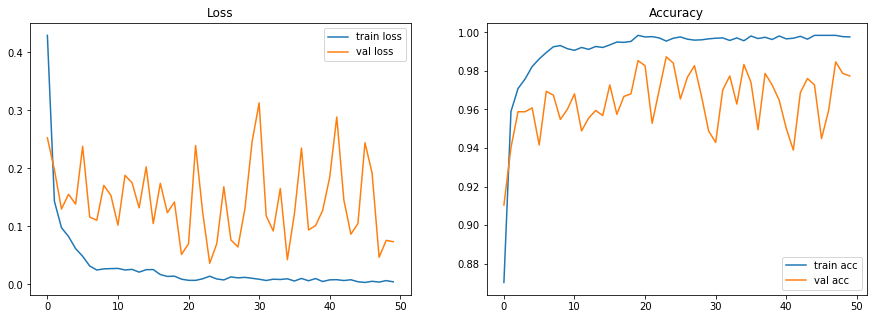

```
----------------------------
Maximum Validation Accuracy: 98.74 %  !!!
----------------------------
Epoch 24/50
189/188 [==============================] - 69s 365ms/step - loss    : 0.0143 - acc    : 0.9955 - 
                                                            val_loss: 0.0366 - val_acc: 0.9874
```